In [62]:
# Dependencies
%matplotlib notebook
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
import pylab
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import datetime
now = datetime.datetime.now()
# Twitter API Keys
from twit_api import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [63]:
results_list = []
bbc_list=[]
bbc_compound_list = []
bbc_positive_list = []
bbc_negative_list = []
bbc_neutral_list = []
bbc_counter=0
bbc_tweet_times=[]
bbc_count_list=[]
cbs_list=[]
cbs_compound_list = []
cbs_positive_list = []
cbs_negative_list = []
cbs_neutral_list = []
cbs_counter=0
cbs_tweet_times=[]
cnn_list=[]
cnn_compound_list = []
cnn_positive_list = []
cnn_negative_list = []
cnn_neutral_list = []
cnn_counter=0
cnn_tweet_times=[]
fox_list=[]
fox_compound_list = []
fox_positive_list = []
fox_negative_list = []
fox_neutral_list = []
fox_counter=0
fox_tweet_times=[]
nyt_list=[]
nyt_compound_list = []
nyt_positive_list = []
nyt_negative_list = []
nyt_neutral_list = []
nyt_counter=0
nyt_tweet_times=[]
cbs_count_list=[]
cnn_count_list=[]
fox_count_list=[]
nyt_count_list=[]
o_compound_list=[]

In [64]:
# Target Search Term
target_terms = ("@bbcworld", "@cbstweet", "@cnn",
                "@foxnews", "@nytimes")

#"Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"


# Loop through all target users
for target in target_terms:

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweet_times=[]
    counter=0
    # change to equal 100 tweets
    for x in range(2):

        # Run search around each tweet
        public_tweets = api.search(target, count=100, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers
                and tweet["user"]["statuses_count"] > min_tweets
                and tweet["user"]["statuses_count"] < max_tweets
                and tweet["user"]["friends_count"] < max_following
                and tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                counter+=1
                # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                if target==target_terms[0]:
                    bbc_list.append(target)
                    bbc_compound_list.append(compound)
                    bbc_positive_list.append(pos)
                    bbc_negative_list.append(neg)
                    bbc_neutral_list.append(neu)
                    bbc_count_list.append(bbc_counter)
                    bbc_counter+=1
                    bbc_tweet_times.append(tweet['created_at'])
                elif target==target_terms[1]:
                    cbs_list.append(target)
                    cbs_compound_list.append(compound)
                    cbs_positive_list.append(pos)
                    cbs_negative_list.append(neg)
                    cbs_neutral_list.append(neu)
                    cbs_count_list.append(cbs_counter)
                    cbs_counter+=1
                    cbs_tweet_times.append(tweet['created_at'])
                elif target==target_terms[2]:
                    cnn_list.append(target)
                    cnn_compound_list.append(compound)
                    cnn_positive_list.append(pos)
                    cnn_negative_list.append(neg)
                    cnn_neutral_list.append(neu)
                    cnn_count_list.append(cnn_counter)
                    cnn_counter+=1
                    cnn_tweet_times.append(tweet['created_at'])
                elif target==target_terms[3]:
                    fox_list.append(target)
                    fox_compound_list.append(compound)
                    fox_positive_list.append(pos)
                    fox_negative_list.append(neg)
                    fox_neutral_list.append(neu)
                    fox_count_list.append(fox_counter)
                    fox_counter+=1
                    fox_tweet_times.append(tweet['created_at'])
                elif target==target_terms[4]:
                    nyt_list.append(target)
                    nyt_compound_list.append(compound)
                    nyt_positive_list.append(pos)
                    nyt_negative_list.append(neg)
                    nyt_neutral_list.append(neu)
                    nyt_count_list.append(nyt_counter)
                    nyt_counter+=1
                    nyt_tweet_times.append(tweet['created_at'])
                else:
                    print("error in creating lists")
            # Set the new oldest_tweet value
            oldest_tweet = tweet["id"] - 1

    # Store the Average Sentiments
    o_compound_list.append(np.mean(compound_list))
    sentiment = {
        "User": target,
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Neutral": np.mean(negative_list),
        "Negative": np.mean(neutral_list),
        "Tweet Count": len(compound_list)
    }

    # Print the Sentiments
    print(sentiment)
    print()
    # Append airline results to 'results_list'
    results_list.append(sentiment)

{'User': '@bbcworld', 'Compound': -0.08719740259740259, 'Positive': 0.04274025974025974, 'Neutral': 0.07151948051948051, 'Negative': 0.8857402597402597, 'Tweet Count': 77}

{'User': '@cbstweet', 'Compound': 0.19863611111111112, 'Positive': 0.12479166666666666, 'Neutral': 0.011763888888888888, 'Negative': 0.8634583333333334, 'Tweet Count': 72}

{'User': '@cnn', 'Compound': 0.1319321739130435, 'Positive': 0.12056521739130435, 'Neutral': 0.057999999999999996, 'Negative': 0.8214521739130435, 'Tweet Count': 115}

{'User': '@foxnews', 'Compound': -0.013604444444444447, 'Positive': 0.059244444444444454, 'Neutral': 0.06728888888888888, 'Negative': 0.8734555555555554, 'Tweet Count': 90}

{'User': '@nytimes', 'Compound': 0.3394656565656565, 'Positive': 0.14263636363636362, 'Neutral': 0.025525252525252527, 'Negative': 0.8318282828282829, 'Tweet Count': 99}



In [65]:
news=pd.DataFrame(results_list).set_index("User").round(3)
news.head()
colors=("lightblue","green","red","blue","yellow")

<IPython.core.display.Javascript object>


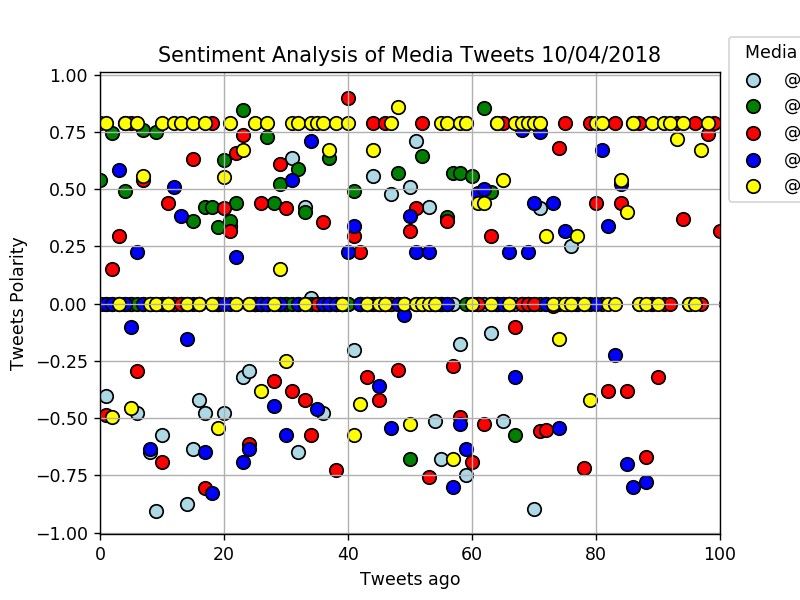

In [69]:
todate=now.strftime("%m/%d/%Y")
plt.figure(1)
plt.scatter(bbc_count_list,bbc_compound_list,edgecolors='black',facecolors="lightblue",s=60)
plt.scatter(cbs_count_list,cbs_compound_list,edgecolors='black',facecolors="green",s=60)
plt.scatter(cnn_count_list,cnn_compound_list,edgecolors='black',facecolors="red",s=60)
plt.scatter(fox_count_list,fox_compound_list,edgecolors='black',facecolors="blue",s=60)
plt.scatter(nyt_count_list,nyt_compound_list,edgecolors='black',facecolors="yellow",s=60)
plt.legend(target_terms, bbox_to_anchor=(1,.7),title="Media Sources")
#plt.set_title("")
#plt.xticks(rotation=90)
plt.xlabel('Tweets ago')
plt.ylabel("Tweets Polarity")
plt.title(f"Sentiment Analysis of Media Tweets {todate}")
plt.xlim(0,100)
plt.grid(b=None, which='major', axis='both')
#save image
plt.savefig("C:/Users/cphin/OneDrive/Documents/Image/graph_1.png")

<IPython.core.display.Javascript object>


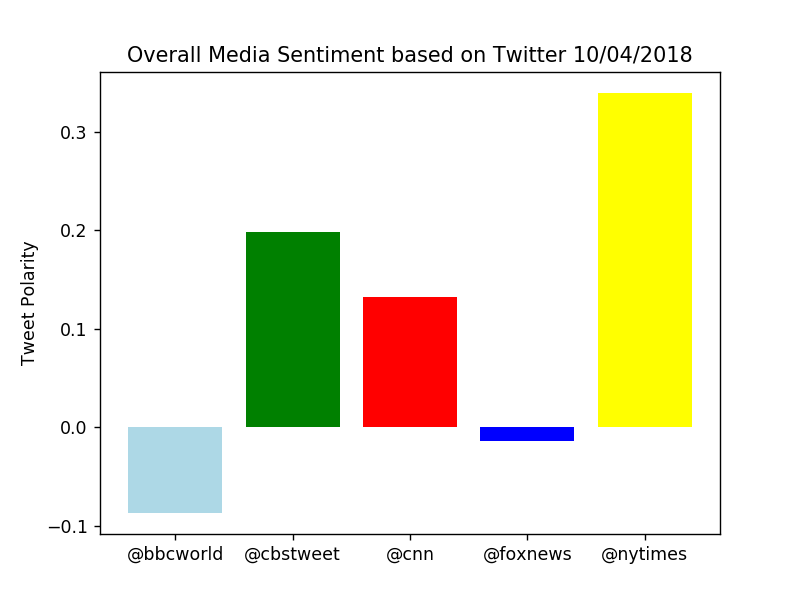

In [71]:
plt.figure(2)
plt.bar(target_terms,o_compound_list,color=colors)
plt.ylabel("Tweet Polarity")
plt.title(f"Overall Media Sentiment based on Twitter {todate}")
#need to add values to the bars
plt.xticks()
#save image
plt.savefig("C:/Users/cphin/OneDrive/Documents/Image/graph_2.png")